In [1]:
# STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Load dataset
df = pd.read_csv(io.BytesIO(uploaded['House Price India.csv']))
df.head()


Saving House Price India.csv to House Price India.csv


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(df.columns)


Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [4]:
# Renaming columns to shorter, convenient names
df.rename(columns={
    'number of bedrooms': 'Bedrooms',
    'number of bathrooms': 'Bathrooms',
    'living area': 'LivingArea',
    'lot area': 'LotArea',
    'number of floors': 'Floors',
    'waterfront present': 'Waterfront',
    'number of views': 'Views',
    'condition of the house': 'Condition',
    'grade of the house': 'Grade',
    'Area of the house(excluding basement)': 'HouseArea',
    'Area of the basement': 'BasementArea',
    'Built Year': 'YearBuilt',
    'Renovation Year': 'YearRenovated',
    'Postal Code': 'Zipcode',
    'Lattitude': 'Latitude',
    'Longitude': 'Longitude',
    'living_area_renov': 'LivingAreaRenov',
    'lot_area_renov': 'LotAreaRenov',
    'Number of schools nearby': 'SchoolsNearby',
    'Distance from the airport': 'AirportDistance',
    'Price': 'Price'
}, inplace=True)


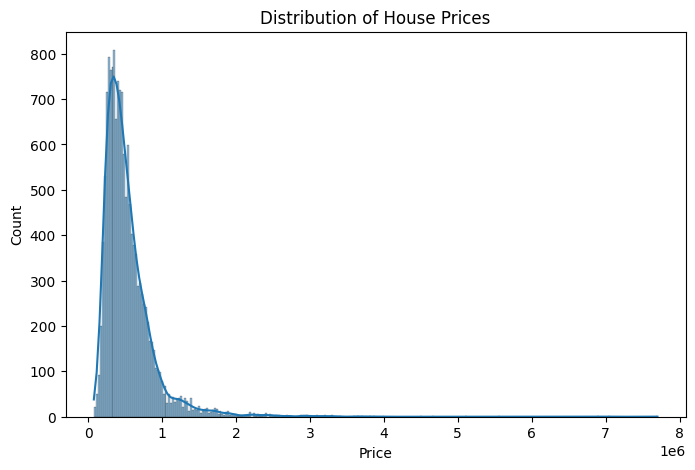

In [13]:
#univariate analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

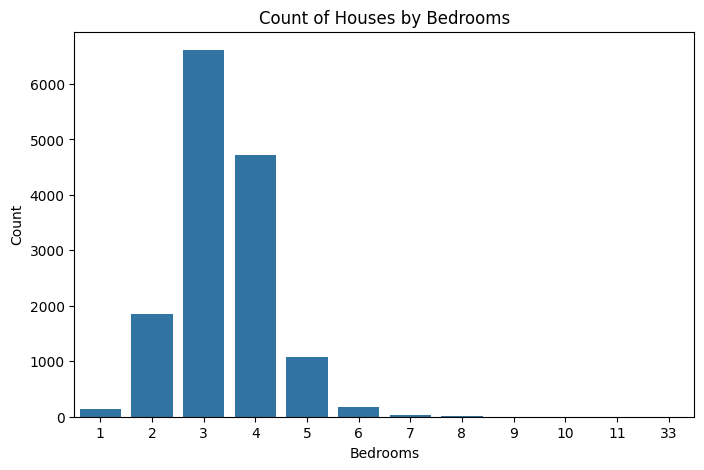

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Bedrooms', data=df)
plt.title("Count of Houses by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

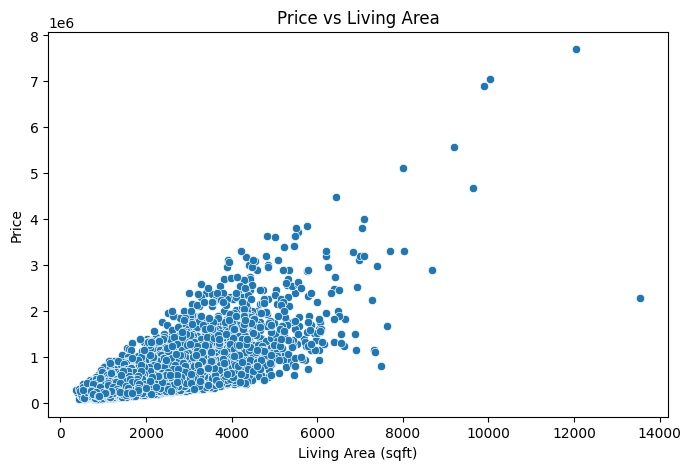

In [15]:
# Bi-Variate Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='LivingArea', y='Price')
plt.title("Price vs Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.show()

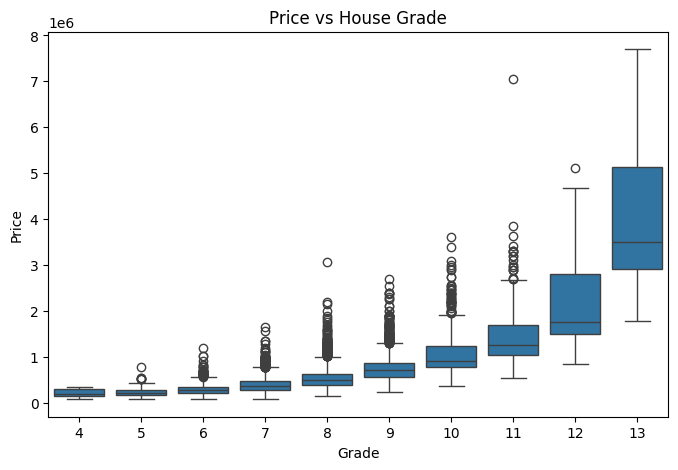

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Grade', y='Price')
plt.title("Price vs House Grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

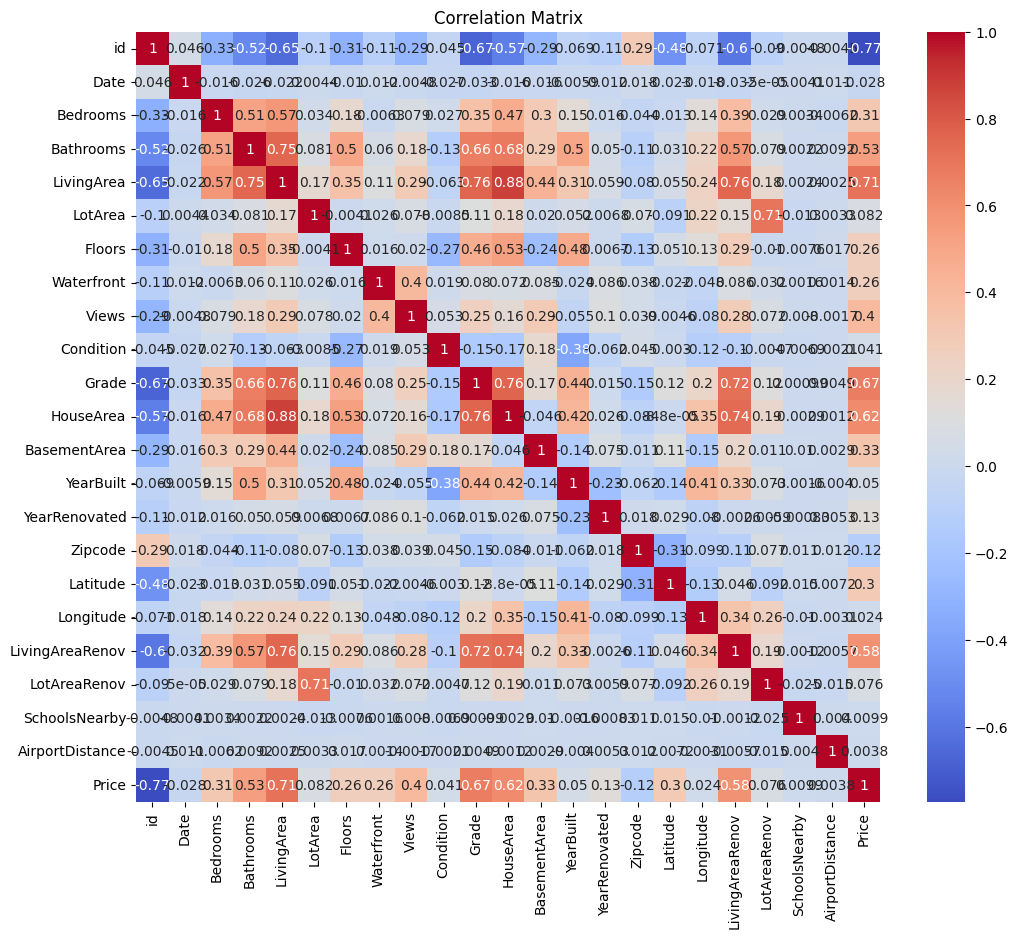

In [17]:
# Multi-Variate Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Descriptive Statistics
df.describe(include='all')


,id,Date,Bedrooms,Bathrooms,LivingArea,LotArea,Floors,Waterfront,Views,Condition,...,YearBuilt,YearRenovated,Zipcode,Latitude,Longitude,LivingAreaRenov,LotAreaRenov,SchoolsNearby,AirportDistance,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [19]:
#Handle Missing Values
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 id                 0
Date               0
Bedrooms           0
Bathrooms          0
LivingArea         0
LotArea            0
Floors             0
Waterfront         0
Views              0
Condition          0
Grade              0
HouseArea          0
BasementArea       0
YearBuilt          0
YearRenovated      0
Zipcode            0
Latitude           0
Longitude          0
LivingAreaRenov    0
LotAreaRenov       0
SchoolsNearby      0
AirportDistance    0
Price              0
dtype: int64


In [20]:
df.fillna({
    'Bedrooms': df['Bedrooms'].median(),
    'Bathrooms': df['Bathrooms'].median(),
    'LivingArea': df['LivingArea'].median(),
    'LotArea': df['LotArea'].median(),
    'Floors': df['Floors'].median(),
    'Waterfront': df['Waterfront'].mode()[0],
    'Views': df['Views'].median(),
    'Condition': df['Condition'].median(),
    'Grade': df['Grade'].median(),
    'Price': df['Price'].median()
}, inplace=True)

# Check again
print("\nMissing values after handling:\n", df.isnull().sum())



Missing values after handling:
 id                 0
Date               0
Bedrooms           0
Bathrooms          0
LivingArea         0
LotArea            0
Floors             0
Waterfront         0
Views              0
Condition          0
Grade              0
HouseArea          0
BasementArea       0
YearBuilt          0
YearRenovated      0
Zipcode            0
Latitude           0
Longitude          0
LivingAreaRenov    0
LotAreaRenov       0
SchoolsNearby      0
AirportDistance    0
Price              0
dtype: int64
